Titanic Project

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection as ms
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
import os
os.chdir('C:/Users/Sharon/Documents/theDevMasters/Project 1 - Titanic/titanic')

In [172]:
train = pd.read_csv('train.csv') #PassengerId 1-891
test = pd.read_csv('test.csv') #PassengerId 892-1309

In [173]:
train = train.drop('Survived',1)
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [174]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [175]:
titanic_df = train.append(test)
del_cols = ['Name', 'Ticket', 'Cabin']
titanic_df = titanic_df.drop(del_cols,1)
titanic_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [176]:
titanic_df.Sex[titanic_df.Sex == 'male'] = 1
titanic_df.Sex[titanic_df.Sex == 'female'] = 0
titanic_df.Embarked[titanic_df.Embarked == 'Q'] = 2
titanic_df.Embarked[titanic_df.Embarked == 'S'] = 1
titanic_df.Embarked[titanic_df.Embarked == 'C'] = 0
titanic_df

C:\Users\Sharon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sharon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sharon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sharon\

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,1
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,1
3,4,1,0,35.0,1,0,53.1000,1
4,5,3,1,35.0,0,0,8.0500,1
5,6,3,1,NaN,0,0,8.4583,2
6,7,1,1,54.0,0,0,51.8625,1
7,8,3,1,2.0,3,1,21.0750,1
8,9,3,0,27.0,0,2,11.1333,1
9,10,2,0,14.0,1,0,30.0708,0


In [177]:
titanic_df.loc[titanic_df['Age']<10,'GroupedAge'] = 0
titanic_df.loc[(titanic_df['Age']>=10) & (titanic_df['Age']<20),'GroupedAge'] = 1
titanic_df.loc[(titanic_df['Age']>=20) & (titanic_df['Age']<30),'GroupedAge'] = 2
titanic_df.loc[(titanic_df['Age']>=30) & (titanic_df['Age']<40),'GroupedAge'] = 3
titanic_df.loc[(titanic_df['Age']>=40) & (titanic_df['Age']<50),'GroupedAge'] = 4
titanic_df.loc[(titanic_df['Age']>=50) & (titanic_df['Age']<60),'GroupedAge'] = 5
titanic_df.loc[(titanic_df['Age']>=60) & (titanic_df['Age']<70),'GroupedAge'] = 6
titanic_df.loc[(titanic_df['Age']>=70) & (titanic_df['Age']<80),'GroupedAge'] = 7
titanic_df.loc[titanic_df['Age']>=80,'GroupedAge'] = 8
titanic_df['GroupedAge'] = titanic_df['GroupedAge'].fillna(11)

In [178]:
titanic_df.loc[titanic_df['Fare']<50,'GroupedFare'] = 0
titanic_df.loc[(titanic_df['Fare']>=50) & (titanic_df['Fare']<100),'GroupedFare'] = 1
titanic_df.loc[(titanic_df['Fare']>=100) & (titanic_df['Fare']<150),'GroupedFare'] = 2
titanic_df.loc[(titanic_df['Fare']>=150) & (titanic_df['Fare']<200),'GroupedFare'] = 3
titanic_df.loc[(titanic_df['Fare']>=200) & (titanic_df['Fare']<250),'GroupedFare'] = 4
titanic_df.loc[(titanic_df['Fare']>=250) & (titanic_df['Fare']<300),'GroupedFare'] = 5
titanic_df.loc[(titanic_df['Fare']>=300) & (titanic_df['Fare']<350),'GroupedFare'] = 6
titanic_df.loc[(titanic_df['Fare']>=350) & (titanic_df['Fare']<400),'GroupedFare'] = 7
titanic_df.loc[(titanic_df['Fare']>=400) & (titanic_df['Fare']<450),'GroupedFare'] = 8
titanic_df.loc[(titanic_df['Fare']>=450) & (titanic_df['Fare']<500),'GroupedFare'] = 9
titanic_df.loc[titanic_df['Fare']>=500,'GroupedFare'] = 10
titanic_df['GroupedFare'] = titanic_df['GroupedFare'].fillna(11)
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(11)

In [179]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Fare           1308 non-null float64
Embarked       1309 non-null int64
GroupedAge     1309 non-null float64
GroupedFare    1309 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 112.5+ KB


In [180]:
del_cols = ['Age', 'Fare']
titanic_df = titanic_df.drop(del_cols,1)

In [181]:
train1 = titanic_df.iloc[0:891]

In [182]:
train = pd.read_csv('train.csv')
train1 = pd.merge(train1, train[['PassengerId','Survived']], on='PassengerId')

In [183]:
train1.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,GroupedAge,GroupedFare,Survived
0,1,3,1,1,0,1,2.0,0.0,0
1,2,1,0,1,0,0,3.0,1.0,1
2,3,3,0,0,0,1,2.0,0.0,1
3,4,1,0,1,0,1,3.0,1.0,1
4,5,3,1,0,0,1,3.0,0.0,0


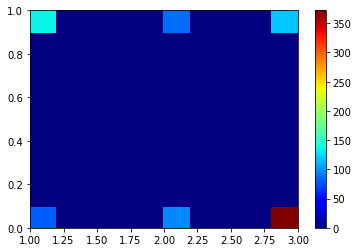

In [184]:
plt.hist2d(train1['Pclass'], train1['Survived'], cmap=plt.cm.jet)
plt.colorbar()
#When Pclass = 3, passenger less likely to survive

In [185]:
train1.groupby(['Pclass','Survived']).size()
372/(372+119)
#75.7% of passengers in Pclass 3 do not survive

0.7576374745417516

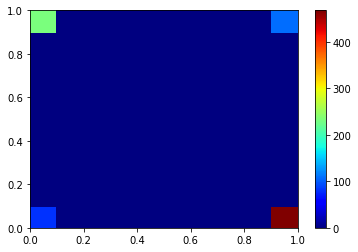

In [186]:
plt.hist2d(train1['Sex'], train1['Survived'], cmap=plt.cm.jet)
plt.colorbar()
#When Sex is 1 (male), passenger less likely to survive

In [187]:
train1.groupby(['Sex','Survived']).size()
468/(468+109)
#81.1% of passengers that are Male do not survive

0.8110918544194108

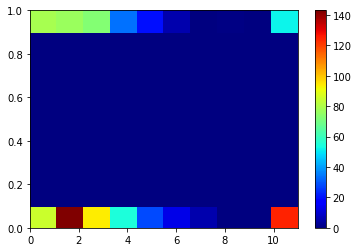

In [188]:
plt.hist2d(train1['GroupedAge'], train1['Survived'], cmap=plt.cm.jet)
plt.colorbar()

In [189]:
train1.groupby(['GroupedAge','Survived']).size()
61/(61+41)
#59.8% of passengers that are age 10-20 do not survive, but it does not seem as significant as sex and pclass

0.5980392156862745

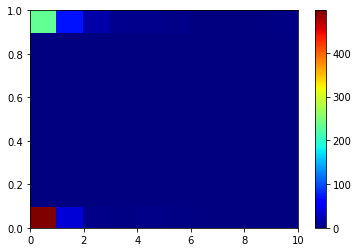

In [190]:
plt.hist2d(train1['GroupedFare'], train1['Survived'], cmap=plt.cm.jet)
plt.colorbar()

In [191]:
train1.groupby(['GroupedFare','Survived']).size()
497/(497+233)
#68% of participants that have fare $0-50 do not survive, but it does not seem as significant as sex and pclass

0.6808219178082192

Logistic Regression

In [227]:
#Logistic Regression
clf_k_scores = []
for train, test in kf.split(X_train):
    logreg = LogisticRegression()
    logreg.fit(X_train[train], y_train[train])
    clf_k_scores.append(logreg.score(X_train[test], y_train[test]))

scores = np.array(clf_k_scores)
k_scores = scores.mean()
print(k_scores)

0.7833333333333333


C:\Users\Sharon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sharon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sharon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sharon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sharon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [228]:
submission = logreg.predict(X_test)

In [229]:
Passenger_Id = titanic_df.iloc[891:,0].values

In [242]:
submission_final = pd.DataFrame({'Passenger': Passenger_Id, 'Survived': submission}, columns=['Passenger', 'Survived'])
submission_final

,Passenger,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [244]:
submission_final.to_csv(r'submission_final.csv',index=False)